In [1]:
import numpy as np
import pandas as pd

# Q1. Sales Data Analysis

You are a data analyst at an e-commerce company. Your task is to analyze sales data, clean and process it, perform statistical analysis, and generate visual insights to help the business make informed decisions.

1. Use your roll number as the random seed to generate unique data for each stud
---



In [2]:
roll_number = 102316018
np.random.seed(roll_number)

### Part I: Randomized Sales Data Generation (NumPy)

1. **Initialize Random Seed**

2. **Generate Sales Data:**
   - Create a NumPy array of random sales data for 12 months (shape = (12, 4)), where each column represents a product category:
     - **Electronics**, **Clothing**, **Home & Kitchen**, **Sports**.
   - Sales values should be between **1000 and 5000 units** per month.
   - The range should be randomized using the seed.

3. **Convert to DataFrame**
   - Convert the cleaned NumPy array into a Pandas DataFrame with:
     - **Columns**: Electronics, Clothing, Home & Kitchen, Sports
     - **Index**: Months from **Jan** to **Dec**
an to Dec


In [4]:
sales = np.random.randint(1000, 5001, size=(12,4))
print(sales)

[[3821 2241 4548 1602]
 [1110 3935 4979 3478]
 [2195 2510 4913 3636]
 [1212 3241 2223 3966]
 [4740 2745 3100 2119]
 [3242 1623 1031 3707]
 [1290 2066 2231 4931]
 [1544 1012 2925 4283]
 [1222 3754 3620 2784]
 [2757 1164 3526 4447]
 [4278 2823 1844 1073]
 [3322 1871 3296 1895]]


In [5]:
months=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']
colm = ['electronics','clothing','home & kitchen','sports']
sales_df = pd.DataFrame(sales, columns=colm, index=months)
sales_df

,electronics,clothing,home & kitchen,sports
jan,3821,2241,4548,1602
feb,1110,3935,4979,3478
mar,2195,2510,4913,3636
apr,1212,3241,2223,3966
may,4740,2745,3100,2119
june,3242,1623,1031,3707
july,1290,2066,2231,4931
aug,1544,1012,2925,4283
sep,1222,3754,3620,2784
oct,2757,1164,3526,4447


## Part II: Data Manipulation and Analysis

### 1. Display the First 5 Rows and Summary Statistics
We first examine the initial rows and descriptive statistics of the sales data.
This helps us understand the distribution, mean, minimum, maximum, and standard deviation of sales across categories.

### 2. Calculate Total Sales
- **Total sales per category** are calculated by summing up all sales values in each column.
- **Total sales per month** are calculated by summing across the row (i.e., across all four categories).

This gives us a clear idea of which category and which months performed the best in terms of sales.

### 3. Average Sales Growth Between Consecutive Months
We calculate the month-to-month percentage change for each category using `pct_change()`.
Then, we find the average of these monthly changes for each product category to understand overall growth trends.

The result is expressed as a percentage.

### 4. Add Total Sales and Growth Rate Columns
- **Total Sales**: A new column that adds up all four product categories per month.
- **Growth Rate (%)**: A new column that calculates the percentage change in Total Sales compared to the previous month.

These new columns help to observe overall sales performance trends.

### 5. Apply a Randomized Discount
Based on the roll number:
- If the roll number is **even**, we apply a **10% discount to the Electronics** category


In [6]:
print(sales_df.head(), '\n')
print(sales_df.describe(), '\n')
print(sales_df.sum(), '\n')
print(sales_df.sum(axis=1))

     electronics  clothing  home & kitchen  sports
jan         3821      2241            4548    1602
feb         1110      3935            4979    3478
mar         2195      2510            4913    3636
apr         1212      3241            2223    3966
may         4740      2745            3100    2119 

       electronics     clothing  home & kitchen       sports
count    12.000000    12.000000       12.000000    12.000000
mean   2561.083333  2415.416667     3186.333333  3160.083333
std    1309.643842   938.018749     1233.191597  1240.919707
min    1110.000000  1012.000000     1031.000000  1073.000000
25%    1273.000000  1809.000000     2229.000000  2063.000000
50%    2476.000000  2375.500000     3198.000000  3557.000000
75%    3446.750000  2927.500000     3852.000000  4045.250000
max    4740.000000  3935.000000     4979.000000  4931.000000 

electronics       30733
clothing          28985
home & kitchen    38236
sports            37921
dtype: int64 

jan     12212
feb     13502
ma

In [7]:
# percantage change
growth = pd.DataFrame(index=sales_df.index, columns=colm)
for c in colm:
    growth[c] = ((sales_df[c]-sales_df[c].shift(1)) / (sales_df[c].shift(1))) *100
print(growth)
# averaging the change
avg_growth = growth.mean()
print('\n' , avg_growth)

      electronics    clothing  home & kitchen      sports
jan           NaN         NaN             NaN         NaN
feb    -70.950013   75.591254        9.476693  117.103620
mar     97.747748  -36.213469       -1.325567    4.542841
apr    -44.783599   29.123506      -54.752697    9.075908
may    291.089109  -15.303919       39.451192  -46.570852
june   -31.603376  -40.874317      -66.741935   74.941010
july   -60.209747   27.295132      116.391853   33.018613
aug     19.689922  -51.016457       31.107127  -13.141351
sep    -20.854922  270.948617       23.760684  -34.998833
oct    125.613748  -68.993074       -2.596685   59.734195
nov     55.168662  142.525773      -47.702779  -75.871374
dec    -22.346891  -33.722990       78.741866   76.607642

 electronics       30.778240
clothing          27.214551
home & kitchen    11.437250
sports            18.585584
dtype: float64


In [9]:
total_sales_m = sales_df.sum(axis=1)
sales_df['Total_sales']=total_sales_m
print(sales_df)

sales_df['Growth_rate'] = sales_df['Total_sales'].pct_change()*100
print('\n',sales_df)

      electronics  clothing  home & kitchen  sports  clothing (SALE)  \
jan          3821      2241            4548    1602          1904.85   
feb          1110      3935            4979    3478          3344.75   
mar          2195      2510            4913    3636          2133.50   
apr          1212      3241            2223    3966          2754.85   
may          4740      2745            3100    2119          2333.25   
june         3242      1623            1031    3707          1379.55   
july         1290      2066            2231    4931          1756.10   
aug          1544      1012            2925    4283           860.20   
sep          1222      3754            3620    2784          3190.90   
oct          2757      1164            3526    4447           989.40   
nov          4278      2823            1844    1073          2399.55   
dec          3322      1871            3296    1895          1590.35   

      Total_sales  
jan      14116.85  
feb      16846.75  
mar

In [8]:
sales_df['clothing (SALE)']=sales_df['clothing']*0.85
print(sales_df)

      electronics  clothing  home & kitchen  sports  clothing (SALE)
jan          3821      2241            4548    1602          1904.85
feb          1110      3935            4979    3478          3344.75
mar          2195      2510            4913    3636          2133.50
apr          1212      3241            2223    3966          2754.85
may          4740      2745            3100    2119          2333.25
june         3242      1623            1031    3707          1379.55
july         1290      2066            2231    4931          1756.10
aug          1544      1012            2925    4283           860.20
sep          1222      3754            3620    2784          3190.90
oct          2757      1164            3526    4447           989.40
nov          4278      2823            1844    1073          2399.55
dec          3322      1871            3296    1895          1590.35


## Part III: VisualizaƟons (Matplotlib and Seaborn)

#### 1. Plot monthly sales trends for each category using line plots.
#### 2. Create the following plots:
    - Box plots to show the sales distribuƟon for each category.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

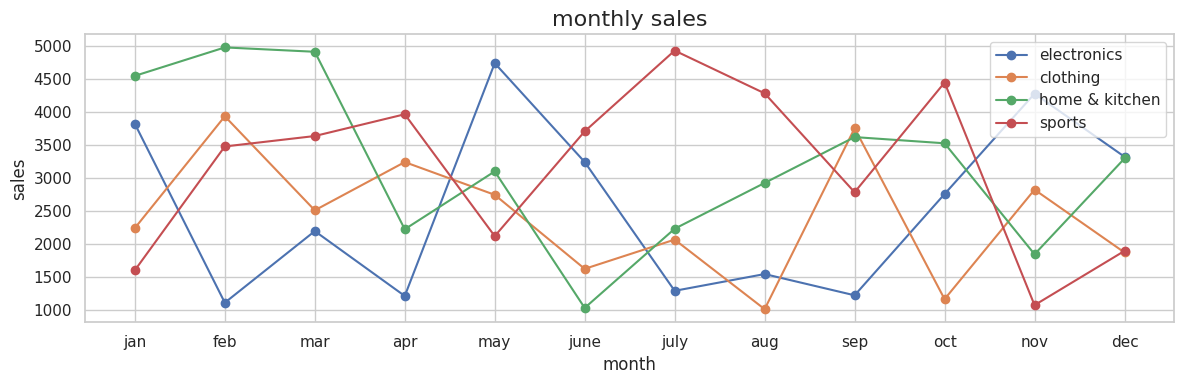

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
for c in colm:
    plt.plot(sales_df.index, sales_df[c], marker='o', label=c)
plt.title("monthly sales", fontsize='16')
plt.xlabel("month")
plt.ylabel("sales")
plt.tight_layout()
plt.legend()
plt.show()

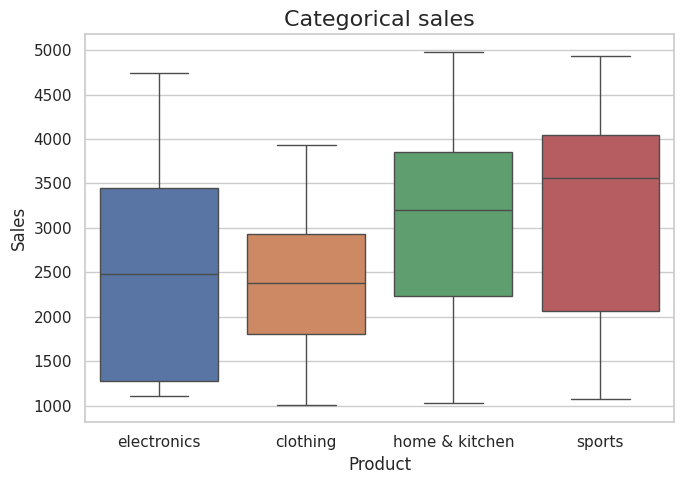

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(data=sales_df[colm])
plt.title('Categorical sales', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

## Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])

        i. Find element-wise absolute value
       ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each row.
      iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and each row

In [13]:
array = np.array([[ 1,-2, 3],
                  [-4, 5,-6]])
abs_arr = np.abs(array)
print(abs_arr)

[[1 2 3]
 [4 5 6]]


In [14]:
arr_1d = array.flatten()
percentiled = np.percentile(arr_1d, [25,50,75])
print("Flattened array perenctiles: ", percentiled)

percentiled_colm = np.percentile(array, [25,50,75], axis=0)
print("Column wise array perenctiles: ", percentiled_colm)

percentiled_row = np.percentile(array, [25,50,75], axis=1)
print("Row wise array perenctiles: ", percentiled_row)


Flattened array perenctiles:  [-3.5 -0.5  2.5]
Column wise array perenctiles:  [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]
Row wise array perenctiles:  [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]


In [15]:
mean_flat = np.mean(arr_1d)
median_flat = np.median(arr_1d)
std_flat = np.std(arr_1d)
print(f"Flattened arr mean:{mean_flat}, median:{median_flat}, standard dev:{std_flat}")

mean_flat = np.mean(array, axis=0)
median_flat = np.median(array, axis=0)
std_flat = np.std(array, axis=0)
print(f"Column wise arr mean:{mean_flat}, median:{median_flat}, standard dev:{std_flat}")

mean_flat = np.mean(array, axis=1)
median_flat = np.median(array, axis=1)
std_flat = np.std(array, axis=1)
print(f"Row wise arr mean:{mean_flat}, median:{median_flat}, standard dev:{std_flat}")

Flattened arr mean:-0.5, median:-0.5, standard dev:3.8622100754188224
Column wise arr mean:[-1.5  1.5 -1.5], median:[-1.5  1.5 -1.5], standard dev:[2.5 3.5 4.5]
Row wise arr mean:[ 0.66666667 -1.66666667], median:[ 1. -4.], standard dev:[2.05480467 4.78423336]


### Q.3 for array : a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
     i. Find floor, ceiling and trunc

In [16]:
a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
floor_val=np.floor(a)
ceil_val=np.ceil(a)
trunc_val=np.trunc(a)
print(f"Floor vals: {floor_val}, \nceiling vals: {ceil_val}, \ntruncated vals: {trunc_val}")


Floor vals: [-2. -2. -1.  0.  1.  1.  3.], 
ceiling vals: [-1. -1. -0.  1.  2.  2.  3.], 
truncated vals: [-1. -1. -0.  0.  1.  1.  3.]


## Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.


In [17]:
my_list = [10, 20, 30, 40, 50]
i = 1
j = 3
temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp
print("New list:", my_list)


New list: [10, 40, 30, 20, 50]


## Q.5 Write a Python program to swap two elements in a set by converƟng it to a list first.

In [18]:
my_set = {10, 20, 30, 40, 50}
my_list = list(my_set)
i = 0
j = 2
temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp
my_set_swapped = set(my_list)
print("Set :", my_set_swapped)


Set : {40, 10, 50, 20, 30}
